In [66]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge


In [67]:
with open('../dataset/hsreply_data/sorted/decks.json', 'r') as file:
    decks = json.load(file)

In [68]:
# 79767 is prince

In [69]:
sorted_decks = sorted(decks, key=lambda x: x['total_games'], reverse=True)


In [70]:
columns = ['class', 'y']
for i in range(30):
    columns.append('card_' + str(i))

df = pd.DataFrame(columns=columns)

count = 0
for deck in decks:
    count += 1
    if count == 600:
        break
    tmp = []
    tmp.append(int(deck['archetype_id']))
    if deck['archetype_id'] <= 0:
        continue
    tmp.append(deck['win_rate'])
    deck_list = deck['deck_list']
    success = True

    for card_info, card_count in deck_list:
        card_ind = card_info
        if card_ind == 79767:
            success = False
            break
        if card_count == 2:
            tmp.append(card_ind)
        tmp.append(card_ind)
    if success:
        df.loc[len(df)] = tmp

In [71]:
print(df)

     class      y    card_0    card_1    card_2    card_3    card_4    card_5  \
0    171.0  79.57   78086.0   84737.0   84737.0   69705.0   69705.0   98061.0   
1    171.0  78.28   78086.0   84737.0   84737.0   69705.0   69705.0   98061.0   
2    171.0  78.22   86661.0   78086.0   84737.0   84737.0   69705.0   69705.0   
3    615.0  77.44  101874.0  100101.0   85034.0   85034.0   98417.0   98417.0   
4    171.0  76.60   78086.0   84737.0   84737.0   98061.0   69705.0   69705.0   
..     ...    ...       ...       ...       ...       ...       ...       ...   
497  631.0  57.44   86111.0   86111.0   97215.0   97215.0  100936.0  100936.0   
498  161.0  57.40   93881.0   77311.0   77311.0   85152.0   85152.0   96628.0   
499  612.0  57.38   72598.0   72598.0   97467.0   97467.0   94735.0   94735.0   
500  632.0  57.26   98417.0   98417.0  102743.0  102743.0  103463.0   97702.0   
501   36.0  57.21  101989.0   91078.0   98520.0   77370.0  103471.0   97112.0   

       card_6    card_7  ..

In [72]:
with open('../dataset/hsreply_data/sorted/cards.json', 'r') as file:
    data_dict = json.load(file)

In [73]:
types = set(('MINION', 'SPELL', 'WEAPON', 'HERO', 'LOCATION'))

In [74]:
cards = ['class', 'y']
for card in data_dict.values():
    if 'type' in card:
        if card['type'] in types:
            cards.append(card['dbfId'])

In [75]:
cards_df = pd.DataFrame(columns=cards)
cards_df = pd.DataFrame(0, columns=cards, index=range(len(df)))
cards_df['class'] = df['class'].values
cards_df['class'] = cards_df['class'].astype(str)
cards_df['y'] = df['y'].values


In [76]:
for ind, deck in df.iterrows():
    for i in deck.values[2:]:
        cards_df.loc[ind, int(i)] += 1


In [77]:
cards_df = cards_df.loc[:, (cards_df != 0).any(axis=0)]

In [78]:
cards_df

,class,y,62347,62442,62497,62498,62698,66176,66856,66861,...,102718,102719,102743,102790,102902,102904,102969,103462,103463,103471
0,171.0,79.57,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171.0,78.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,171.0,78.22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,615.0,77.44,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,171.0,76.60,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,631.0,57.44,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,161.0,57.40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,612.0,57.38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,632.0,57.26,0,0,0,0,0,0,0,0,...,0,0,2,0,0,2,0,0,1,0


In [79]:
print(cards_df)

     class      y  62347  62442  62497  62498  62698  66176  66856  66861  \
0    171.0  79.57      0      0      0      0      0      0      0      0   
1    171.0  78.28      0      0      0      0      0      0      0      0   
2    171.0  78.22      0      0      0      0      0      0      0      0   
3    615.0  77.44      0      0      0      0      0      0      0      0   
4    171.0  76.60      0      0      0      0      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
497  631.0  57.44      0      0      0      0      0      0      0      0   
498  161.0  57.40      0      0      0      0      0      0      0      0   
499  612.0  57.38      0      0      0      0      0      0      0      0   
500  632.0  57.26      0      0      0      0      0      0      0      0   
501   36.0  57.21      0      0      0      0      0      0      0      0   

     ...  102718  102719  102743  102790  102902  102904  102969  103462  \

In [80]:
X = cards_df.drop(['y'], axis=1)  # 选择除了'class'和'y'列之外的所有列作为特征
y = cards_df['y']

# 将数据集分割为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 选择和训练模型
# 这里选择线性回归模型作为示例，您可以根据实际需求选择其他模型
model = RandomForestRegressor()

# 标准化特征 (可选)
scaler = StandardScaler()
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 训练模型
model.fit(X_train_scaled, y_train)

# 3. 模型验证
# 在验证集上进行预测
y_pred = model.predict(X_val_scaled)

# 计算均方误差 (MSE) 作为模型性能的度量
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error on Validation Set: {mse}')

Mean Squared Error on Validation Set: 16.879592918223366


In [81]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制散点图
plt.scatter(y_val, y_pred, alpha=0.5)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# 添加一条线性趋势线
line = np.linspace(min(y_val), max(y_val), 100)
plt.plot(line, line, color='red', linestyle='--')

plt.show()


Top 5 Important Features:
98212: 0.0492585779754519
73774: 0.0469146798516293
101109: 0.036422662074184625
100284: 0.0360615480896956
78144: 0.027813210966967046


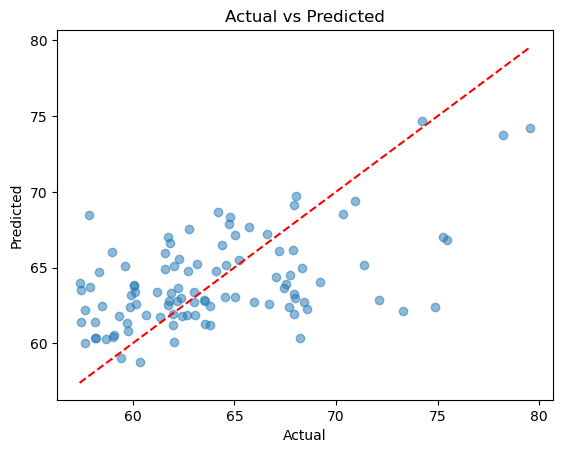

In [82]:
# Find the indices of the most accurate and least accurate predictions
best_prediction_index = np.argmin((y_val - y_pred)**2)  # Index with the smallest squared error
worst_prediction_index = np.argmax((y_val - y_pred)**2)  # Index with the largest squared error

# Get the corresponding input data for the best and worst predictions
best_prediction_input = X_val.iloc[best_prediction_index, :]
worst_prediction_input = X_val.iloc[worst_prediction_index, :]

# Print the results
print("Best Prediction Input:")
print(best_prediction_input)

print("\nWorst Prediction Input:")
print(worst_prediction_input)


In [82]:
feature_importance = model.feature_importances_

# 获取特征名称
feature_names = X.columns

# 将特征重要性与特征名称进行关联
feature_importance_dict = dict(zip(feature_names, feature_importance))

# 按照重要性降序排列
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 取前20个特征
top_20_features = sorted_feature_importance[:20]

# 分离特征名称和重要性值
sorted_feature_names, sorted_feature_importance = zip(*top_20_features)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importance for Predicting y')
plt.show()

In [83]:
# 1. 分割数据集
X = cards_df.drop(['class', 'y'], axis=1)
y = cards_df['y']

# 将数据集分割为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. 特征标准化 (可选)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 3. 构建 Bayesian Ridge 模型
model = BayesianRidge()

# 4. 训练模型
model.fit(X_train_scaled, y_train)

# 5. 模型验证
# 在验证集上进行预测
y_pred = model.predict(X_val_scaled)

# 计算均方误差 (MSE) 作为模型性能的度量
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error on Validation Set: {mse}')

# 6. 特征重要性
feature_importance = model.coef_

# 获取特征名称
feature_names = X.columns

# 将特征重要性与特征名称进行关联
feature_importance_dict = dict(zip(feature_names, feature_importance))

# 按照重要性降序排列
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# 取前20个特征
top_20_features = sorted_feature_importance[:20]

# 分离特征名称和重要性值
sorted_feature_names, sorted_feature_importance = zip(*top_20_features)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importance for Predicting y (Bayesian Ridge)')
plt.show()

Best Prediction Input:
class     360.0
62347         0
62442         0
62497         0
62498         0
          ...  
102904        0
102969        0
103462        0
103463        0
103471        1
Name: 305, Length: 724, dtype: object

Worst Prediction Input:
class     161.0
62347         0
62442         0
62497         0
62498         0
          ...  
102904        0
102969        0
103462        0
103463        0
103471        0
Name: 15, Length: 724, dtype: object


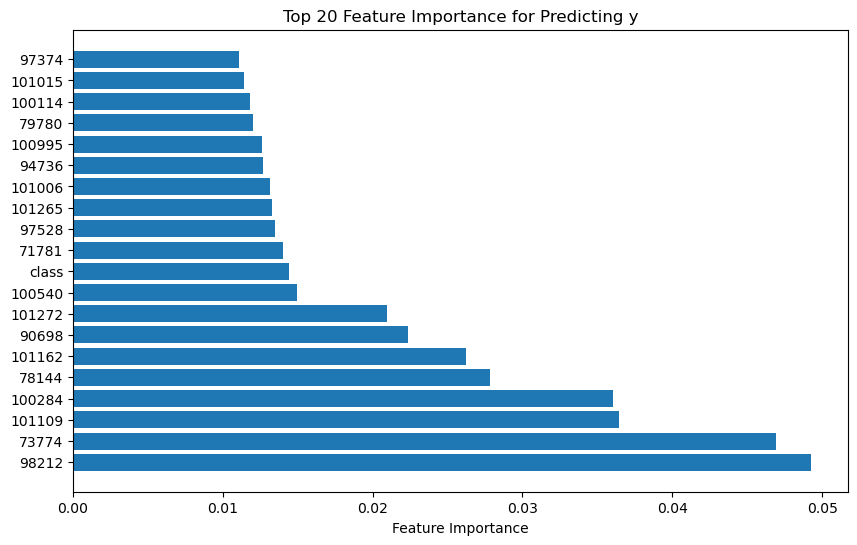

In [84]:
reg = BayesianRidge()
reg.fit(X_train, y_train)
pred = reg.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, pred))

print("RMSE : % f" %(rmse))
plt.scatter(y_val.values,pred)
plt.plot(np.arange(40,70,0.05),np.arange(40,70,0.05), color='red')
plt.show()

np.corrcoef(y_val.values,pred)**2